# Quiz 2 - Model Comparisons
Wyatt Blair

5/5/2024

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random

import sys
sys.path.append('../')

from data import get_data
from util import plot_data, evaluate_model

In [2]:
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

___
## Autoencoder

$E_\phi: \mathscr{X} \xrightarrow{} \mathscr{Z}$

        
$z = E_\phi(x)$


$D_\theta: \mathscr{Z} \xrightarrow{} \mathscr{X}$


$x' = D_\theta(z)$


$E_\phi :=$ encoder, parameterized by $\phi$

$D_\theta :=$ decoder, parameterized by $\theta$ 

$x :=$ input message 

$z :=$ latent code 

$x' :=$ decoded message

In [3]:
class LSTMEncoder(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMEncoder, self).__init__()
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

    def forward(self, x):
        outputs, (hidden, cell) = self.lstm(x)

        return outputs, hidden, cell

class LSTMDecoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMDecoder, self).__init__()

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden, cell):
        outputs, (hidden, cell) = self.lstm(x, (hidden, cell))
        predictions = self.fc(outputs)

        return predictions

class LSTMAutoencoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMAutoencoder, self).__init__()
        
        self.encoder = LSTMEncoder(input_size, hidden_size, num_layers)
        self.decoder = LSTMDecoder(hidden_size, hidden_size, num_layers, output_size)

    def forward(self, x):
        encoder_output, hidden, cell = self.encoder(x)

        # # Decoder input should be created here depending on how you want to initialize it.
        # # A common method is to use the last input or a zero tensor as initial input.
        # decoded_input = torch.zeros_like(x)
        decoded_output = self.decoder(encoder_output, hidden, cell)

        return decoded_output

Training LSTMAutoencoder:   0%|          | 0/100 [00:00<?, ?it/s]

R2-Scores: 
--> TRAIN: 0.74338
--> TEST : -0.00302
--> FULL : 0.73705
MSE-Scores: 
--> TRAIN: 0.00992
--> TEST : 0.01693
--> FULL : 0.01131


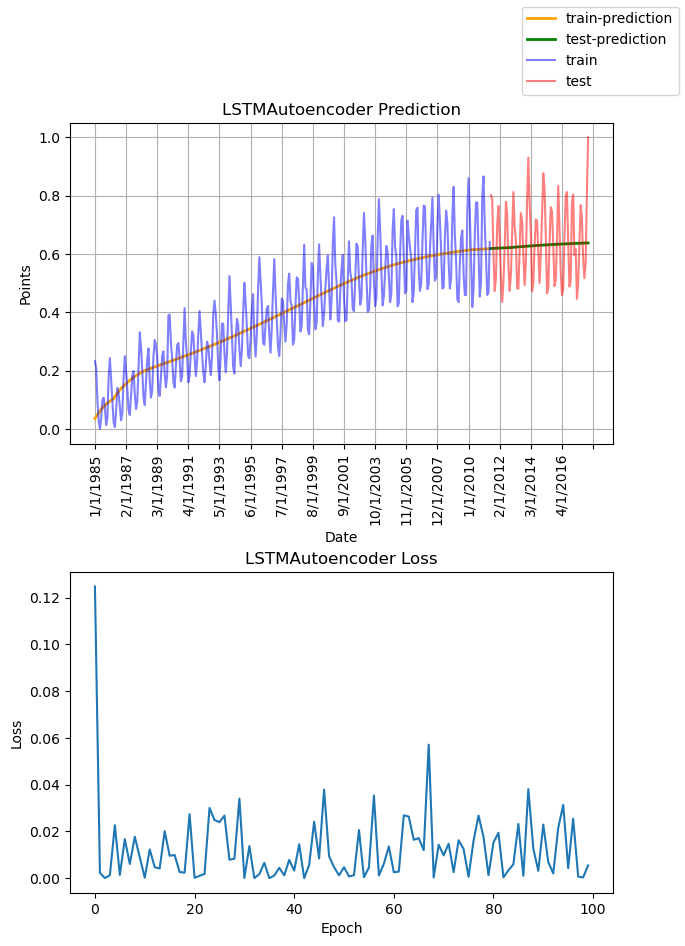

In [5]:
input_size = 1  # Number of features in the time series
hidden_size = 64
num_layers = 2
output_size = 1 # Predicting one feature


# instantiate model
model_kwargs = {
    'input_size': get_data()['sequence_length'],
    'hidden_size': 64,
    'num_layers': 2,
    'output_size': 1
}
model = LSTMAutoencoder(**model_kwargs)

# run train/evaluation
evaluation_kwargs = {
    'model': model,
    'num_epochs': 100,
    'lr': 0.00001,
    'fft': False,
}
evaluate_model(**evaluation_kwargs)